In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orange = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/orange.csv")
orange

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [49]:
orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [50]:
orange.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [51]:
orange["Color"].unique()

array(['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red',
       'Yellow-Orange'], dtype=object)

In [52]:
orange["Blemishes (Y/N)"].unique()

array(['N', 'Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)', 'N (Minor)',
       'N (Split Skin)'], dtype=object)

In [79]:
orange.loc[orange["Blemishes (Y/N)"].str.startswith("Y"), "Blemishes (Y/N)"] = "Y"
orange.loc[orange["Blemishes (Y/N)"].str.startswith("N"), "Blemishes (Y/N)"] = "N"

In [54]:
orange["Blemishes (Y/N)"].unique()

array(['N', 'Y'], dtype=object)

In [87]:
orange["Variety"].unique()

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

In [55]:
# Color, Blemishes 열을 원 핫 인코딩 해줘야 됨
o_encoding = pd.get_dummies(orange, columns=["Color", "Blemishes (Y/N)"])
o_encoding

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Quality (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,Color_Orange-Red,Color_Yellow-Orange,Blemishes (Y/N)_N,Blemishes (Y/N)_Y
0,7.5,180,12.0,3.2,2.0,10,4.0,Valencia,4.0,False,False,True,False,False,True,False
1,8.2,220,10.5,3.4,3.0,14,4.5,Navel,4.5,True,False,False,False,False,True,False
2,6.8,150,14.0,3.0,1.0,7,5.0,Cara Cara,5.0,False,True,False,False,False,True,False
3,9.0,250,8.5,3.8,4.0,21,3.5,Blood Orange,3.5,False,False,False,True,False,True,False
4,8.5,210,11.5,3.3,2.5,12,5.0,Hamlin,4.5,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Tangerine,5.0,False,False,False,True,False,False,True
237,7.4,275,8.5,3.5,5.0,20,5.0,Minneola (Hybrid),4.0,False,True,False,False,False,True,False
238,7.5,196,15.7,3.0,3.0,13,3.0,Temple,5.0,True,False,False,False,False,False,True
239,7.2,251,9.8,4.3,3.0,23,1.0,Moro (Blood),3.0,False,True,False,False,False,False,True


In [56]:
X = o_encoding.drop('Variety', axis=1) # 독립변수
y = o_encoding['Variety'] # 종속변수
display(X, y)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,Color_Orange-Red,Color_Yellow-Orange,Blemishes (Y/N)_N,Blemishes (Y/N)_Y
0,7.5,180,12.0,3.2,2.0,10,4.0,4.0,False,False,True,False,False,True,False
1,8.2,220,10.5,3.4,3.0,14,4.5,4.5,True,False,False,False,False,True,False
2,6.8,150,14.0,3.0,1.0,7,5.0,5.0,False,True,False,False,False,True,False
3,9.0,250,8.5,3.8,4.0,21,3.5,3.5,False,False,False,True,False,True,False
4,8.5,210,11.5,3.3,2.5,12,5.0,4.5,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,5.0,False,False,False,True,False,False,True
237,7.4,275,8.5,3.5,5.0,20,5.0,4.0,False,True,False,False,False,True,False
238,7.5,196,15.7,3.0,3.0,13,3.0,5.0,True,False,False,False,False,False,True
239,7.2,251,9.8,4.3,3.0,23,1.0,3.0,False,True,False,False,False,False,True


0               Valencia
1                  Navel
2              Cara Cara
3           Blood Orange
4                 Hamlin
             ...        
236            Tangerine
237    Minneola (Hybrid)
238               Temple
239         Moro (Blood)
240                Jaffa
Name: Variety, Length: 241, dtype: object

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 15) (73, 15) (168,) (73,)


In [58]:
# 3. 표준화 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
#독립변수만 스케일링(표준화, 정규화)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

print(display(X_train_scaled))

array([[ 0.92268428,  0.58069848, -1.45129008, ..., -0.19245009,
        -1.35921213,  1.35921213],
       [-0.83215676, -1.11331501,  0.8452014 , ..., -0.19245009,
         0.73572033, -0.73572033],
       [ 1.41014012,  1.02649151, -0.56802413, ..., -0.19245009,
         0.73572033, -0.73572033],
       ...,
       [-0.53968326, -0.75668059,  0.13858863, ..., -0.19245009,
         0.73572033, -0.73572033],
       [ 0.72770194,  0.56286676,  0.91586267, ..., -0.19245009,
        -1.35921213,  1.35921213],
       [-0.83215676,  1.57927486, -0.42670158, ..., -0.19245009,
        -1.35921213,  1.35921213]])

None


In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [70]:
print(f"knn score(train) = {round(knn.score(X_train_scaled, y_train), 2)}%")
print(f"knn score(test) = {round(knn.score(X_test_scaled, y_test), 2)}%")

knn score(train) = 0.2%
knn score(test) = 0.14%


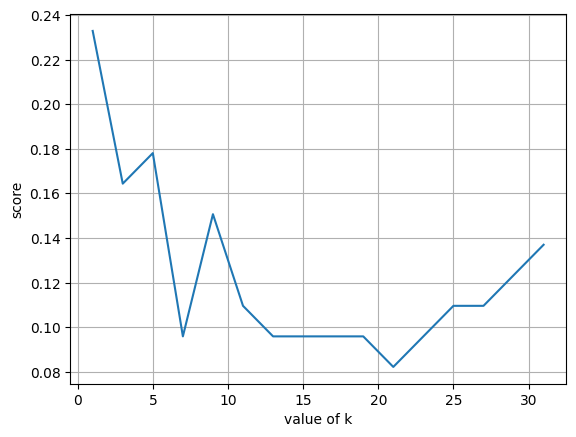

In [64]:
k_range = range(1, 32, 2)

scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_range, scores)
plt.xlabel("value of k")
plt.ylabel("score")
plt.grid()
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
print(f"lr score(train) = {round(lr.score(X_train_scaled, y_train), 2)}%")
print(f"lr score(test) = {round(lr.score(X_test_scaled, y_test), 2)}%")

lr score(train) = 0.38%
lr score(test) = 0.14%


In [72]:
# Decision Tree, plot_tree 임포트, 모델 생성, 학습, 스코어 계산

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f"dt score(train) = {round(dt.score(X_train, y_train), 2)}%")
print(f"dt score(test) = {round(dt.score(X_test, y_test), 2)}%")

dt score(train) = 0.99%
dt score(test) = 0.15%


In [73]:
orange["Variety"].unique()

array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

In [80]:
print(orange["Quality (1-5)"])
orange["Quality (1-5)"] = orange["Quality (1-5)"].astype(int)
print(orange["Quality (1-5)"])

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64
0      4
1      4
2      5
3      3
4      4
      ..
236    5
237    4
238    5
239    3
240    4
Name: Quality (1-5), Length: 241, dtype: int64


In [88]:
# Color, Blemishes 열을 원 핫 인코딩 해줘야 됨
o_encoding = pd.get_dummies(orange, columns=["Color", "Blemishes (Y/N)", "Variety"])
o_encoding

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Color_Deep Orange,Color_Light Orange,...,Variety_Navel (Early Season),Variety_Navel (Late Season),Variety_Ortanique (Hybrid),Variety_Satsuma Mandarin,Variety_Star Ruby,Variety_Tangelo (Hybrid),Variety_Tangerine,Variety_Temple,Variety_Valencia,Variety_Washington Navel
0,7.5,180,12.0,3.2,2.0,10,4.0,4,False,False,...,False,False,False,False,False,False,False,False,True,False
1,8.2,220,10.5,3.4,3.0,14,4.5,4,True,False,...,False,False,False,False,False,False,False,False,False,False
2,6.8,150,14.0,3.0,1.0,7,5.0,5,False,True,...,False,False,False,False,False,False,False,False,False,False
3,9.0,250,8.5,3.8,4.0,21,3.5,3,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.5,210,11.5,3.3,2.5,12,5.0,4,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,5,False,False,...,False,False,False,False,False,False,True,False,False,False
237,7.4,275,8.5,3.5,5.0,20,5.0,4,False,True,...,False,False,False,False,False,False,False,False,False,False
238,7.5,196,15.7,3.0,3.0,13,3.0,5,True,False,...,False,False,False,False,False,False,False,True,False,False
239,7.2,251,9.8,4.3,3.0,23,1.0,3,False,True,...,False,False,False,False,False,False,False,False,False,False


In [89]:
X = o_encoding.drop('Quality (1-5)', axis=1) # 독립변수
y = o_encoding['Quality (1-5)'] # 종속변수
display(X, y)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,...,Variety_Navel (Early Season),Variety_Navel (Late Season),Variety_Ortanique (Hybrid),Variety_Satsuma Mandarin,Variety_Star Ruby,Variety_Tangelo (Hybrid),Variety_Tangerine,Variety_Temple,Variety_Valencia,Variety_Washington Navel
0,7.5,180,12.0,3.2,2.0,10,4.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,8.2,220,10.5,3.4,3.0,14,4.5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.8,150,14.0,3.0,1.0,7,5.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,9.0,250,8.5,3.8,4.0,21,3.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.5,210,11.5,3.3,2.5,12,5.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
237,7.4,275,8.5,3.5,5.0,20,5.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
238,7.5,196,15.7,3.0,3.0,13,3.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
239,7.2,251,9.8,4.3,3.0,23,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


0      4
1      4
2      5
3      3
4      4
      ..
236    5
237    4
238    5
239    3
240    4
Name: Quality (1-5), Length: 241, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 38) (73, 38) (168,) (73,)


In [91]:
# 3. 표준화 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
#독립변수만 스케일링(표준화, 정규화)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

print(display(X_train_scaled))

array([[-0.79155566, -1.0575685 , -0.07379027, ..., -0.2515773 ,
        -0.2236068 , -0.2515773 ],
       [-0.79155566,  0.76516612,  1.28770412, ..., -0.2515773 ,
        -0.2236068 , -0.2515773 ],
       [-0.61281728,  0.8554005 , -0.32459186, ..., -0.2515773 ,
        -0.2236068 , -0.2515773 ],
       ...,
       [-0.88092484,  1.5772756 , -0.28876306, ..., -0.2515773 ,
        -0.2236068 , -0.2515773 ],
       [ 0.45961296, -0.29959965,  1.46684812, ..., -0.2515773 ,
        -0.2236068 , -0.2515773 ],
       [ 1.71078158,  1.37875995, -1.50694225, ..., -0.2515773 ,
        -0.2236068 , -0.2515773 ]])

None


In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

print(f"knn score(train) = {round(knn.score(X_train_scaled, y_train), 2)}%")
print(f"knn score(test) = {round(knn.score(X_test_scaled, y_test), 2)}%")

knn score(train) = 0.65%
knn score(test) = 0.44%


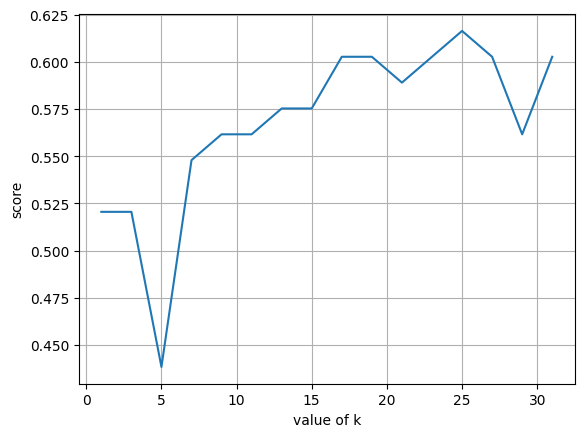

In [93]:
k_range = range(1, 32, 2)

scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_range, scores)
plt.xlabel("value of k")
plt.ylabel("score")
plt.grid()
plt.show()

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
print(f"lr score(train) = {round(lr.score(X_train_scaled, y_train), 2)}%")
print(f"lr score(test) = {round(lr.score(X_test_scaled, y_test), 2)}%")

lr score(train) = 0.88%
lr score(test) = 0.55%


In [95]:
# Decision Tree, plot_tree 임포트, 모델 생성, 학습, 스코어 계산

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f"dt score(train) = {round(dt.score(X_train, y_train), 2)}%")
print(f"dt score(test) = {round(dt.score(X_test, y_test), 2)}%")

dt score(train) = 1.0%
dt score(test) = 0.63%


In [96]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)

print(f"dt1 score(train) = {round(dt1.score(X_train, y_train), 2)}%")
print(f"dt1 score(test) = {round(dt1.score(X_test, y_test), 2)}%")

dt1 score(train) = 0.74%
dt1 score(test) = 0.59%
